# Data manipulations

A matrix transformation is a matrix multiplication between a transformation matrix M and a data matrix D that gives you a manipulated data matrix D' as output.

We can use matrix multiplications to transform our data (our data points, represented as feature vectors).

## Load and look at our data

Let's load the used car data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

data = np.array(np.genfromtxt('data/vehiclesNumeric.csv', delimiter=',', skip_header=1, dtype=int, encoding="utf-8", usecols=[1,2,3]))  

# get a pandas dataframe for plotting
df = pd.DataFrame(data, columns=["price", "year", "odometer"])

Let's get some **summary statistics**.

In [3]:
def getSummaryStatistics(data):
    print("min, max, mean, std per variable")
    return pd.DataFrame([data.min(axis=0), data.max(axis=0), data.mean(axis=0), data.std(axis=0)])

def getShapeType(data):
    print("shape")
    return (data.shape, data.dtype)

print(getSummaryStatistics(data))
print(getShapeType(data))

min, max, mean, std per variable
              0            1             2
0      0.000000  1999.000000  0.000000e+00
1  55000.000000  2021.000000  9.999999e+06
2   7978.281507  2012.381887  1.124405e+05
3   5542.906703     3.997048  2.546163e+05
shape
((3158, 3), dtype('int64'))


Let's plot the used car data.

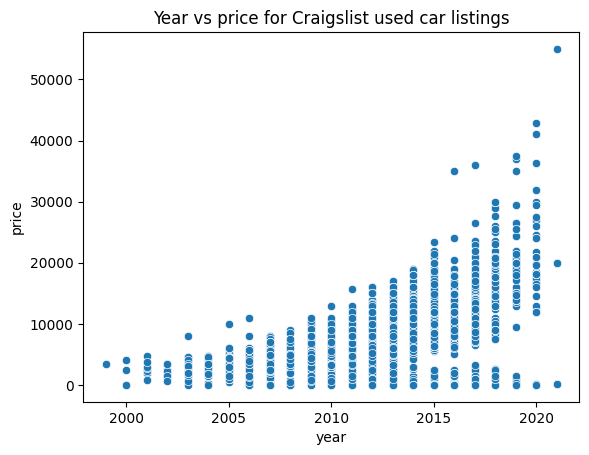

In [4]:
def plot2d(data):
    sns.scatterplot(pd.DataFrame(data[:, [0, 1]], columns=["price", "year"]), x="year", y="price").set(title="Year vs price for Craigslist used car listings")
    
plot2d(data)

## Review

A translation matrix for two-variable data looks like:
$$\begin{pmatrix} 1 & 0 & x \\ 0 & 1 & y \\ 0 & 0 & 1\end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables translated, respectively.

A scaling matrix for two-variable data looks like:
$$\begin{pmatrix} x & 0 \\ 0 & y \end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables scaled, respectively. 

You can combine them if you add a third column to the scaling matrix with all 0s except for the last item (a 1):
$$\begin{pmatrix} x & 0 & 0 \\ 0 & y & 0 \\ 0 & 0 & 1 \end{pmatrix}$$



## Global max-min normalization

Add homogenized coordinate so we can translate!

In [5]:
# How do we append a whole column?
homogenizedData = np.append(data, np.array([np.ones(data.shape[0], dtype=int)]).T, axis=1)
print("homogenized data")
print(getSummaryStatistics(homogenizedData))
print(getShapeType(homogenizedData))

homogenized data
min, max, mean, std per variable
              0            1             2    3
0      0.000000  1999.000000  0.000000e+00  1.0
1  55000.000000  2021.000000  9.999999e+06  1.0
2   7978.281507  2012.381887  1.124405e+05  1.0
3   5542.906703     3.997048  2.546163e+05  0.0
shape
((3158, 4), dtype('int64'))


Visualization and modeling will be much easier if the ranges of my data are more similar. Let's just transform our data to be in the range [0, 1].

Here are two ways to get there.

First, let's try **global (max-min) normalization**.

Here is how that works:
1. subtract the global minimum from each datapoint
2. divide by the global range (max - min)

The transformation matrix for two variables looks like:
$$\begin{pmatrix} \frac{1}{(max(data)-min(data))} & 0 & -min(data) \\ 0 & \frac{1}{(max(data)-min(data))} & -min(data) \\ 0 & 0 & 1\end{pmatrix}$$

What does this look like in terms of scaling and translation?

What does the transformation matrix look like, specifically, for our data?
$$\begin{pmatrix} \frac{1}{9999999} & 0 & 0 & -0 \\ 0 & \frac{1}{9999999} & 0 & -0 \\ 0 & 0 & \frac{1}{9999999} & -0 \\ 0 & 0 & 0 & 1\end{pmatrix}$$


In [8]:
# subtract the global minimum from each datapoint
translateTransform = np.eye(homogenizedData.shape[1], dtype=float)
for i in range(data.shape[1]):
    ## the notebook you got for class had "translateTransform[1, 2]". A few great teams said, hey, Dr. Stent, this should be the column indexed at 3 for 3-dimensional input data! Always point out when you think you see a bug!
    translateTransform[i, 3] = -data.min()
print("translateTransform")
print(translateTransform)

# divide by the global range
scaleTransform = np.eye(homogenizedData.shape[1])
for i in range(data.shape[1]):
    scaleTransform[i, i] = 1/(data.max()-data.min())
print("scaleTransform")
print(scaleTransform)

# when we do a series of transformations, first we multiply the smaller transformation matrices, and only at the end the result of that with the larger data matrix (more efficient!)
totalTransform = scaleTransform@translateTransform
print("transformMatrix")
print("shape\n", getShapeType(totalTransform))
print(totalTransform)


translateTransform
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
scaleTransform
[[1.0000001e-07 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000001e-07 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000001e-07 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
transformMatrix
shape
shape
 ((4, 4), dtype('float64'))
[[1.0000001e-07 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000001e-07 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000001e-07 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


after global normalization, transformedData
min, max, mean, std per variable
          0             1         2    3
0  0.000000  1.999000e-04  0.000000  1.0
1  0.005500  2.021000e-04  1.000000  1.0
2  0.000798  2.012382e-04  0.011244  1.0
3  0.000554  3.997048e-07  0.025462  0.0
shape
((3158, 4), dtype('float64'))


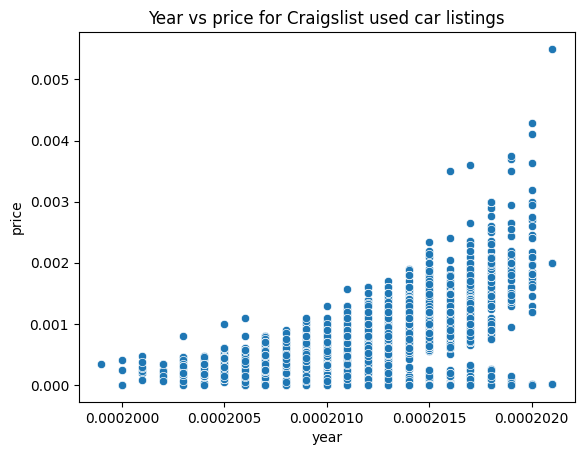

In [9]:
transformedData = (totalTransform@homogenizedData.T).T
print("after global normalization, transformedData")
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

What seems weird to you about this process? What seems solid?

## Per-variable max-min normalization

Here's another way. Let's try **max-min normalization per variable**.

The transformation matrix for two variables, $x$ and $y$, looks like:
$$\begin{pmatrix} \frac{1}{(max(x)-min(x))} & 0 & -min(x) \\ 0 & \frac{1}{(max(y)-min(y))} & -min(y) \\ 0 & 0 & 1\end{pmatrix}$$

What does this look like in terms of scaling and translation?

What does the transformation matrix look like for our data, specifically?
$$\begin{pmatrix} \frac{1}{55000} & 0 & 0 & -0 \\ 0 & \frac{1}{22} & 0 & -1999 \\ 0 & 0 & \frac{1}{9999999} & -0 \\ 0 & 0 & 0 & 1\end{pmatrix}$$
(NB in class we just divided by the max, which works great as long as the min is 0, but for YEAR doesn't work out so well. Use max-min! **Speak up when you see a mistake!**)


before per variable normalization, homogenizedData
min, max, mean, std per variable
              0            1             2    3
0      0.000000  1999.000000  0.000000e+00  1.0
1  55000.000000  2021.000000  9.999999e+06  1.0
2   7978.281507  2012.381887  1.124405e+05  1.0
3   5542.906703     3.997048  2.546163e+05  0.0
transformMatrix
[[ 1.81818182e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.54545455e-02  0.00000000e+00 -9.08636364e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000010e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
after per variable normalization, transformedData
min, max, mean, std per variable
         0         1         2    3
0  0.00000  0.000000  0.000000  1.0
1  1.00000  1.000000  1.000000  1.0
2  0.14506  0.608268  0.011244  1.0
3  0.10078  0.181684  0.025462  0.0
shape
((3158, 4), dtype('float64'))


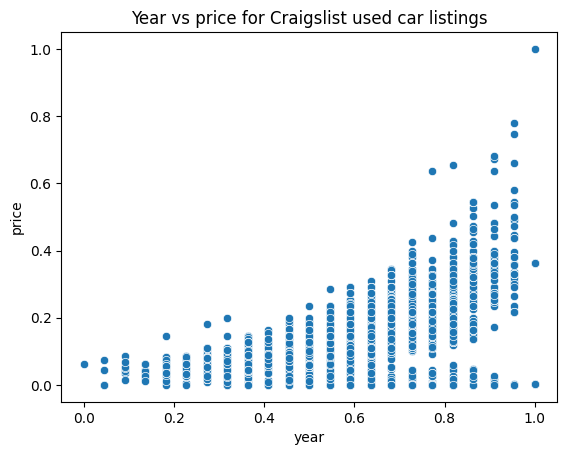

Bad pipe message: %s [b'0\xe1/>3\xcckh@\xc4d\xc8{\xd1\xb9\xab@\x0c \xd95`\xd7\x8d\xf7O\xd8\x1bA\xf5\xba\x1cEE\xfc|-7\xf1B\x03\xac\xd2\x10\x85\xab\x96\x91\x90\xdat\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01']
Bad pipe message: %s [b'\n']
Bad pipe message: %s [b'\xde\xed\x97\x1c\xc7\x90A\x85\xbf\xe4\xf3\xe2\x10\x90\x88}V\x03 \x93*P4\x82\xd5\x89k\n\x18\xc9\xc7\x8f3\xfb\x11\xfb3\xa1N/\xb7\x18\xfd+\xe3\x11u;d?&\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05']
Bad pipe message: %s [b"\xd7\x1c\xfd\x98\xa2vtg\n\x98\xc1\xcaL+\xa0\x01m\xbf\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xa

In [10]:
print("before per variable normalization, homogenizedData")
print(getSummaryStatistics(homogenizedData))

translateTransform = np.eye(homogenizedData.shape[1], dtype=float)
for i in range(data.shape[1]):
    ## the notebook you got for class had "translateTransform[1, 2]". A few great teams said, hey, Dr. Stent, this should be the column indexed at 3 for 3-dimensional input data! Always point out when you think you see a bug!
    translateTransform[i, 3] = -data[:, i].min()

scaleTransform = np.eye(homogenizedData.shape[1], dtype=float)
for i in range(data.shape[1]):
    scaleTransform[i, i] = 1/(data[:, i].max()-data[:, i].min())

totalTransform = scaleTransform@translateTransform
print("transformMatrix")
print(totalTransform)

transformedData = (totalTransform @ homogenizedData.T).T
print("after per variable normalization, transformedData")
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

What is good about this way of normalizing our data? What do we not like?

## Challenges

* What if I want to *mean center* my data, or make the mean point zero?
* What if I want to *mean center* and normalize so that the data's range is [-1, 1]?


## Visualizations

There are some nice web-based visualizers that show you how scaling and rotation work (rotation comes next week!). Here is one where you can upload your own picture:
* https://web.ma.utexas.edu/users/ysulyma/matrix/

And here is one that walks through the matrix multiply with you:
* https://www.cs.usfca.edu/~galles/visualization/RotateScale3D.html
* https://www.cs.usfca.edu/~galles/visualization/RotateScale2D.html

And finally, here is an Observable notebook that also reviews the matrix multiply:
* https://observablehq.com/@noonat/transformation-matrices

Happy playing!

## Resources

* https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20162017/LectureNotes/MATH/homogenous.html
* https://www.informit.com/articles/article.aspx?p=2854376&seqNum=8
* https://towardsdatascience.com/normalization-techniques-in-python-using-numpy-b998aa81d754
* https://www.machinecurve.com/index.php/2020/11/19/how-to-normalize-or-standardize-a-dataset-in-python/